# REINFORCEMENT LEARNING WITH Q-LEARNING AND SARSA

## SETUP

In [1]:
import os
import sys
import pandas as pd
from copy import deepcopy

pd.set_option("display.max_columns", None)

# Add the parent directory (where "modules" is located) to the Python path
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

from modules import environment_creation_functions as ecf
from modules import environment as env
from modules import learners as learn
from modules import environment_agent_execution as eae

## LOAD ENVIRONMENT

Initial state of the agent is represented in green color, the final or destination state in red and barrier in black.

Creating maze
Grid of: 8 x 8
Barriers count: 16
Source: (6, 0)
Destination: (3, 7)
Path to destination found.


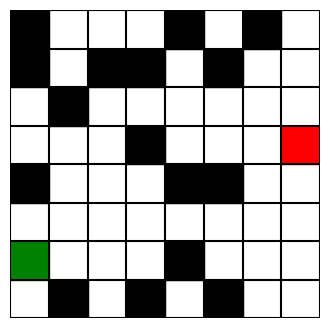

In [3]:
# create environment
dim, grid_matrix_positions, barriers, src, dest, reward_matrix  = ecf.create_environment(False, 4, 20)
environment = env.Environment(reward_matrix, list(src), list(dest)) # convert states from tuple into list

# visualize created environment
%matplotlib inline
ecf.visualize_environment(dim, barriers, src, dest)

## REINFORCEMENT LEARNING RULES

- **Penalty for Each Step**: -1
- **Penalty for Hitting a Barrier** (Black Boxes): -10
- **Penalty for Moving Out of Bounds**: -50

### Q-LEARNER ALGORITHM

- Algorithm pseudocode:

   ```
   Q(,) = 0 # Policy Initialization
   For each episode do:
        `s` = initial state
        For each step, state s (not final) do:
            a = Choose action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a Q(s,)  if random() > exploration_rate  
            Execute action a
            s = s' # New state
            R(s, a) = reward
            Q(s, a)' = Q(s, a) + alpha[R(s, a) + (gamma . max_a'Q(s', a')) - Q(s, a)]       
        end
    end
    ```

#### SHORT-TERM FOCUS

In [4]:
# apply agent learning
episodes_list, best_episode, src = eae.agent_learning(learner=learn.QLearner, # Learning algorithm
                                        environment = deepcopy(environment),  # Agent environment.
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.1,    # Near 0, learn to move to the next most rewarding state
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)

# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 172 - Reward: -942.0
EPISODE 2 - Actions: 104 - Reward: -348.0
EPISODE 3 - Actions: 76 - Reward: -252.0
EPISODE 4 - Actions: 30 - Reward: 70.0
EPISODE 5 - Actions: 258 - Reward: -316.0
EPISODE 6 - Actions: 90 - Reward: 0.0
EPISODE 7 - Actions: 59 - Reward: -18.0
EPISODE 8 - Actions: 281 - Reward: -408.0
EPISODE 9 - Actions: 58 - Reward: 22.0
EPISODE 10 - Actions: 70 - Reward: 0.0
EPISODE 11 - Actions: 110 - Reward: -10.0
EPISODE 12 - Actions: 156 - Reward: -56.0
EPISODE 13 - Actions: 32 - Reward: 58.0
EPISODE 14 - Actions: 106 - Reward: -6.0
EPISODE 15 - Actions: 157 - Reward: -136.0
EPISODE 16 - Actions: 30 - Reward: 70.0
EPISODE 17 - Actions: 240 - Reward: -288.0
EPISODE 18 - Actions: 26 - Reward: 74.0
EPISODE 19 - Actions: 120 - Reward: -20.0
EPISODE 20 - Actions: 36 - Reward: 54.0
EPISODE 21 - Actions: 63 - Reward: -62.0
EPISODE 22 - Actions: 107 - Reward: -56.0
EPISODE 23 - Actions: 74 - Reward: 16.0
EPISODE 24 - Actions: 91 - Reward: -40.0
EPISODE 25 - Action

#### LONG-TERM FOCUS

In [5]:
# apply agent learning
episodes_list, best_episode, src= eae.agent_learning(learner=learn.QLearner, # Learning algorithm
                                        environment = deepcopy(environment), # Agent environment
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.9,    # Near 1, move with a view to maximizing the final reward
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)
# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 38 - Reward: -116.0
EPISODE 2 - Actions: 112 - Reward: -810.0
EPISODE 3 - Actions: 87 - Reward: -244.0
EPISODE 4 - Actions: 59 - Reward: -166.0
EPISODE 5 - Actions: 241 - Reward: -446.0
EPISODE 6 - Actions: 102 - Reward: -100.0
EPISODE 7 - Actions: 185 - Reward: -322.0
EPISODE 8 - Actions: 26 - Reward: 64.0
EPISODE 9 - Actions: 109 - Reward: -78.0
EPISODE 10 - Actions: 25 - Reward: -4.0
EPISODE 11 - Actions: 12 - Reward: 88.0
EPISODE 12 - Actions: 84 - Reward: -34.0
EPISODE 13 - Actions: 46 - Reward: 44.0
EPISODE 14 - Actions: 32 - Reward: 48.0
EPISODE 15 - Actions: 24 - Reward: 76.0
EPISODE 16 - Actions: 27 - Reward: 14.0
EPISODE 17 - Actions: 30 - Reward: 70.0
EPISODE 18 - Actions: 52 - Reward: 28.0
EPISODE 19 - Actions: 28 - Reward: 52.0
EPISODE 20 - Actions: 38 - Reward: 32.0
EPISODE 21 - Actions: 56 - Reward: 24.0
EPISODE 22 - Actions: 34 - Reward: 56.0
EPISODE 23 - Actions: 54 - Reward: 46.0
EPISODE 24 - Actions: 16 - Reward: 74.0
EPISODE 25 - Actions: 24 - R

### SARSA ALGORITHM

- Algorithm pseudocode:

   ```
   Q(,) = 0 # Policy Initialization
   For each episode do:
        `s` = initial state
        For each step, state s (not final) do:
            a = Choose action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a Q(s,)  if random() > exploration_rate  
            Execute action a
            s = s' # New state
            R(s, a) = reward
            a' = Choose new action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a' Q(s',)  if random() > exploration_rate   
            Q(s, a)' = Q(s, a) + alpha[R(s, a) + (gamma . Q(s', a')) - Q(s, a)]       
        end
    end
    ```

#### SHORT-TERM FOCUS

In [6]:
# apply agent learning
episodes_list, best_episode, src = eae.agent_learning(learner=learn.SARSALearner, # Learning algorithm
                                        environment = deepcopy(environment),  # Agent environment.
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.1,    # Near 0, learn to move to the next most rewarding state
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)

# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 100 - Reward: -730.0
EPISODE 2 - Actions: 146 - Reward: -588.0
EPISODE 3 - Actions: 137 - Reward: -254.0
EPISODE 4 - Actions: 144 - Reward: -438.0
EPISODE 5 - Actions: 122 - Reward: -52.0
EPISODE 6 - Actions: 50 - Reward: 50.0
EPISODE 7 - Actions: 224 - Reward: -222.0
EPISODE 8 - Actions: 136 - Reward: -36.0
EPISODE 9 - Actions: 95 - Reward: -182.0
EPISODE 10 - Actions: 118 - Reward: -38.0
EPISODE 11 - Actions: 146 - Reward: -46.0
EPISODE 12 - Actions: 26 - Reward: 74.0
EPISODE 13 - Actions: 104 - Reward: -4.0
EPISODE 14 - Actions: 72 - Reward: 28.0
EPISODE 15 - Actions: 48 - Reward: 52.0
EPISODE 16 - Actions: 85 - Reward: -54.0
EPISODE 17 - Actions: 155 - Reward: -104.0
EPISODE 18 - Actions: 52 - Reward: 38.0
EPISODE 19 - Actions: 34 - Reward: 66.0
EPISODE 20 - Actions: 94 - Reward: -4.0
EPISODE 21 - Actions: 24 - Reward: 76.0
EPISODE 22 - Actions: 125 - Reward: -74.0
EPISODE 23 - Actions: 70 - Reward: 20.0
EPISODE 24 - Actions: 40 - Reward: 60.0
EPISODE 25 - Acti

#### LONG-TERM FOCUS

In [7]:
# apply agent learning
episodes_list, best_episode, src= eae.agent_learning(learner=learn.SARSALearner, # Learning algorithm
                                        environment = deepcopy(environment), # Agent environment
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.9,    # Near 1, move with a view to maximizing the final reward
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)
# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 79 - Reward: -452.0
EPISODE 2 - Actions: 32 - Reward: -50.0
EPISODE 3 - Actions: 168 - Reward: -622.0
EPISODE 4 - Actions: 88 - Reward: -314.0
EPISODE 5 - Actions: 149 - Reward: -108.0
EPISODE 6 - Actions: 54 - Reward: -52.0
EPISODE 7 - Actions: 119 - Reward: -176.0
EPISODE 8 - Actions: 74 - Reward: 26.0
EPISODE 9 - Actions: 62 - Reward: 28.0
EPISODE 10 - Actions: 42 - Reward: 38.0
EPISODE 11 - Actions: 22 - Reward: 58.0
EPISODE 12 - Actions: 38 - Reward: 52.0
EPISODE 13 - Actions: 70 - Reward: -30.0
EPISODE 14 - Actions: 36 - Reward: 54.0
EPISODE 15 - Actions: 24 - Reward: 76.0
EPISODE 16 - Actions: 28 - Reward: 62.0
EPISODE 17 - Actions: 66 - Reward: 14.0
EPISODE 18 - Actions: 22 - Reward: 78.0
EPISODE 19 - Actions: 60 - Reward: 40.0
EPISODE 20 - Actions: 112 - Reward: -160.0
EPISODE 21 - Actions: 44 - Reward: 46.0
EPISODE 22 - Actions: 20 - Reward: 60.0
EPISODE 23 - Actions: 37 - Reward: 14.0
EPISODE 24 - Actions: 44 - Reward: 46.0
EPISODE 25 - Actions: 24 - Rew